In [405]:
import pandas as pd
import matplotlib.pyplot as plt
def setup_plots(version,path,df):
    fig, axs = plt.subplots(3, 1, figsize=(12, 16), sharex=True)
    print(f'version: {version}\n')
    print(df.tail(5)[['step','train_acc', 'train_f1', 'train_loss']])
    # Train Acc
    axs[0].plot(df['step'], df['train_acc'], label='Train Acc', color='blue')
    axs[0].set_ylabel('Train Acc')
    axs[0].set_title('Train Acc vs Step')
    axs[0].legend()
    axs[0].grid(True)

    # Train F1
    axs[1].plot(df['step'], df['train_f1'], label='Train F1', color='green')
    axs[1].set_ylabel('Train F1')
    axs[1].set_title('Train F1 vs Step')
    axs[1].legend()
    axs[1].grid(True)

    # Train Loss
    axs[2].plot(df['step'], df['train_loss'], label='Train Loss', color='red')
    axs[2].set_xlabel('Step')
    axs[2].set_ylabel('Train Loss')
    axs[2].set_title('Train Loss vs Step')
    axs[2].legend()
    axs[2].grid(True)
    for ax in axs:
        ax.set_ylim(0.0, 1.0)
        for ax in axs:
            ax.set_facecolor('black')
            ax.tick_params(colors='white')
            ax.yaxis.label.set_color('white')
            ax.xaxis.label.set_color('white')
            ax.title.set_color('white')
            ax.grid(color='white')
            # Set legend text color to white
            legend = ax.get_legend()
            if legend:
                for text in legend.get_texts():
                    text.set_color('white')
    fig.patch.set_facecolor('black')
    plt.tight_layout()
    plt.show()
    return fig, axs



version: 202

     step  train_acc  train_f1  train_loss
188  9449   0.585938  0.798319    0.440315
189  9499   0.680556  0.835953    0.255348
190  9549   0.682292  0.770335    0.385442
191  9599   0.680556  0.835953    0.335259
192  9649   0.624132  0.888889    0.240193


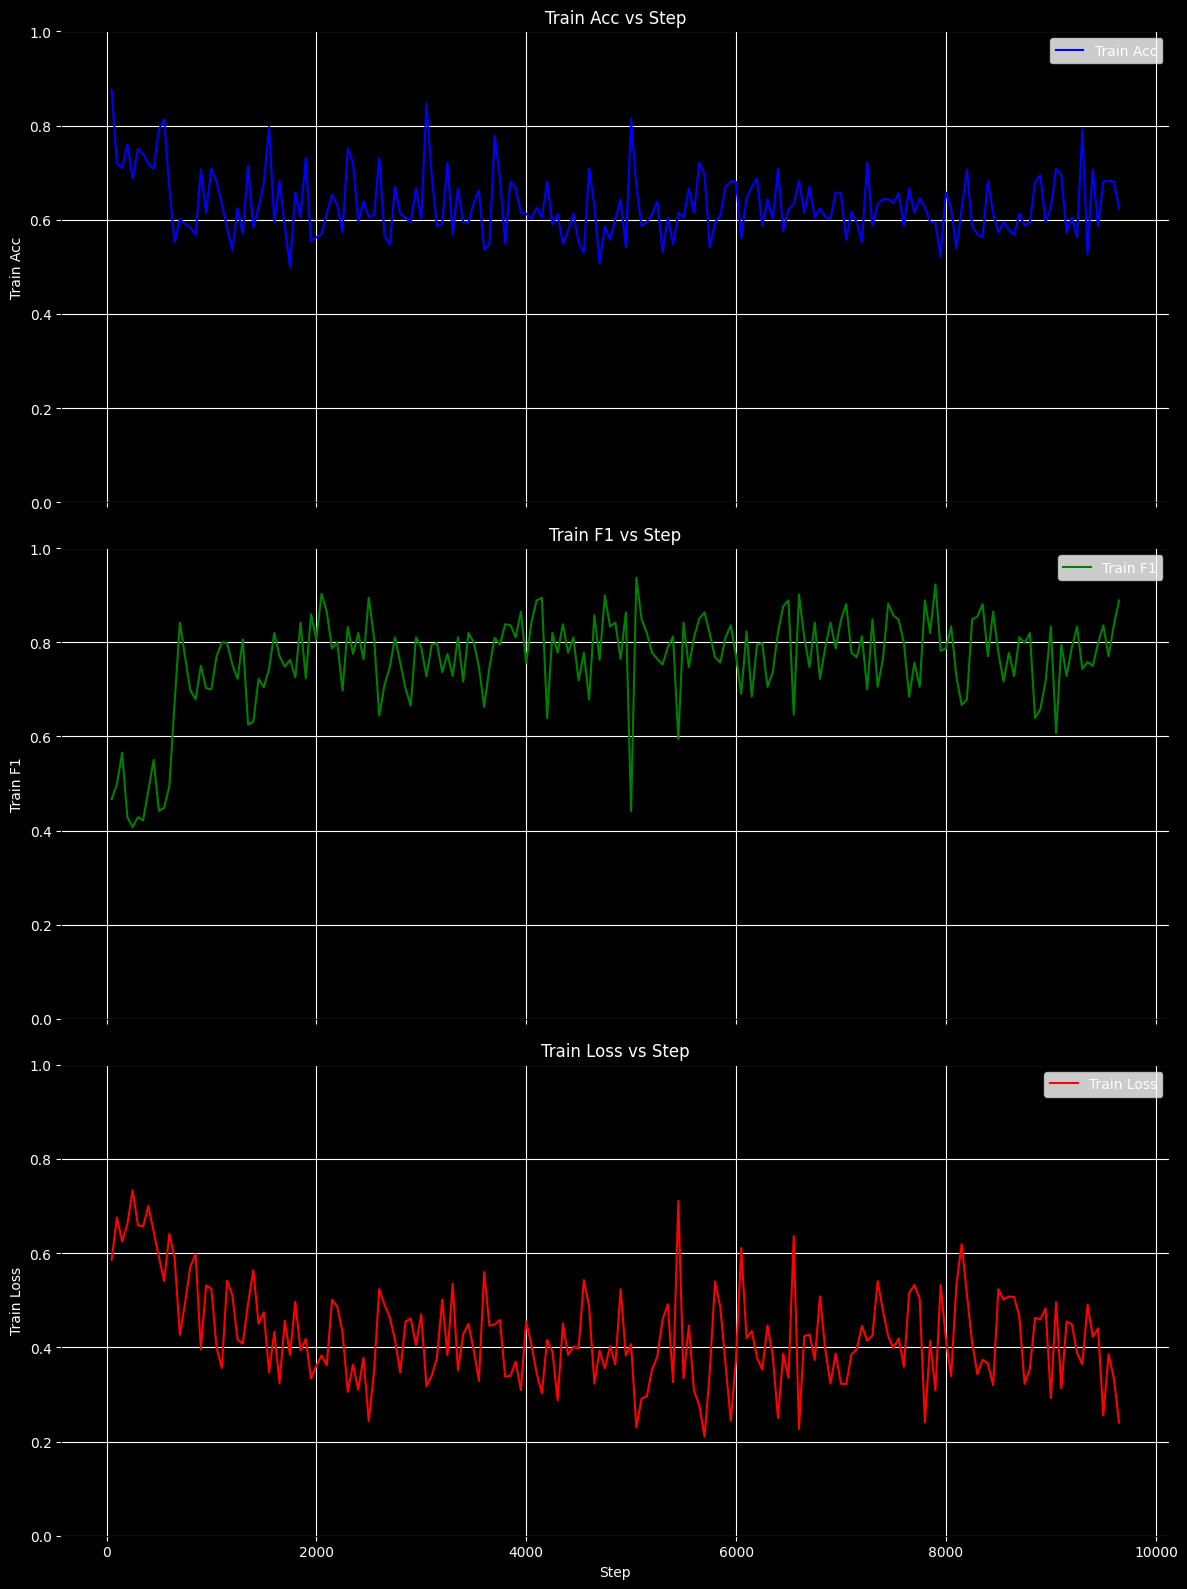

In [406]:
# 172 is one of the best in terms of consistently high accuracy
version = 202; path = f'C:/Files/Development/AI/Transformers/transformer_practice/twitter_sentiment/checkpoints/twitter_sentiment/lightning_logs/version_{version}/metrics.csv'
df = pd.read_csv(path); fig, axs = setup_plots(version=version, path=path, df=df)

In [407]:
acc_avg = df['train_acc'].mean()
f1_avg = df['train_f1'].mean()
loss_avg = df['train_loss'].mean()

print(f'Training Accuracy Average: {acc_avg}')
print(f'Training F1 Average      : {f1_avg}')
print(f'Training Loss Average    : {loss_avg}')

Training Accuracy Average: 0.6319894259457761
Training F1 Average      : 0.7601376047715004
Training Loss Average    : 0.4265670791036724


In [408]:
val_acc_avg = df['val_acc'].mean()
val_f1_avg = df['val_f1'].mean()
val_loss_avg = df['val_loss'].mean()

print(f'Validation Accuracy Average: {val_acc_avg}')
print(f'Validation F1 Average      : {val_f1_avg}')
print(f'Validation Loss Average    : {val_loss_avg}')
df[~pd.isna(df['val_acc'])][['val_acc','val_f1','val_loss']]

KeyError: 'val_acc'

In [ ]:
test_acc_avg = df['test_acc'].mean()
test_f1_avg = df['test_f1'].mean()
test_loss_avg = df['test_loss'].mean()

print(f'Test Accuracy Average: {test_acc_avg}')
print(f'Test F1 Average      : {test_f1_avg}')
print(f'Test Loss Average    : {test_loss_avg}')
df[~pd.isna(df['test_acc'])][['test_acc','test_f1','test_loss']]

Test Accuracy Average: 0.40074244141578674
Test F1 Average      : 0.4006950855255127
Test Loss Average    : 0.7545948624610901


,test_acc,test_f1,test_loss
1237,0.434558,0.434518,0.73415
1238,0.366926,0.366872,0.77504


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("cosmos98/twitter-and-reddit-sentimental-analysis-dataset")

print("Path to dataset files:", path)

C:\Users\ldavi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 10.0M/10.0M [00:00<00:00, 28.2MB/s]

Extracting files...
Path to dataset files: C:\Users\ldavi\.cache\kagglehub\datasets\cosmos98\twitter-and-reddit-sentimental-analysis-dataset\versions\1


C:\Users\ldavi\AppData\Local\Temp\ipykernel_12844\1300016738.py:149: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_train_new = pd.concat([df_train[df_train[class_col] == cls],df_train_new, df_cls_shuffled.iloc[:n_train]])
C:\Users\ldavi\AppData\Local\Temp\ipykernel_12844\1300016738.py:150: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_val_new = pd.concat([df_val[df_val[class_col] == cls], df_val_new, df_cls_shuffled.iloc[n_train:n_train + n_val]])
C:\Users\ldavi\AppData\Local\Temp\ipykerne

Train (917351):
   sentiment  row_count % of total
0        0.0     615883    67.137%
1        1.0     301468    32.863%
Val   (57255):
   sentiment  row_count % of total
0        0.0      56251    98.246%
1        1.0       1004     1.754%
Test  (119050):
   sentiment  row_count % of total
0        0.0     118047    99.157%
1        1.0       1003     0.843%


0

In [26]:
print((len(df_train) == len(df_train[df_train.index.isin(list(df_original.index))])))
print((len(df_val) == len(df_val[df_val.index.isin(list(df_original.index))])))
print((len(df_test) == len(df_test[df_test.index.isin(list(df_original.index))])))

True
True
True


In [5]:
print(list(df_train.index)[:5])

[279302, 569964, 74180, 201073, 668172]


In [30]:
indices_set = set(list(set(list(df_train.index)+list(df_val.index)+list(df_test.index))))
# print(set(indices_set).difference(df_original.index))
print(len(set(list(df_original.index)).difference(indices_set)))
df_original[~df_original.index.isin(indices_set)]['sentiment'].value_counts()

389289


sentiment
0.0    389289
Name: count, dtype: int64

In [7]:
for df_out in get_distributions(df_train, dataset_distributions):
    print(show_distributions(df_out))

9634
   sentiment  row_count % of total
0        0.0     293841    60.205%
1        1.0     194224    39.795%
   sentiment  row_count % of total
0        0.0      79414     100.0%
   sentiment  row_count % of total
0        0.0       8059      6.87%
1        1.0     109251     93.13%


In [8]:
import pandas as pd
df = pd.read_csv('C:/Files/Development/AI/Transformers/transformer_practice/twitter_sentiment/datasets/twitter-and-reddit-sentimental-analysis-dataset/Twitter_Data.csv')
df['category'].value_counts()
# len(df)

category
 1.0    72250
 0.0    55213
-1.0    35510
Name: count, dtype: int64

In [9]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("durgeshrao9993/twitter-analysis-dataset-2022")

print("Path to dataset files:", path)

C:\Users\ldavi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ldavi\.cache\kagglehub\datasets\durgeshrao9993\twitter-analysis-dataset-2022\versions\2
